In [94]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [95]:
df = pd.read_csv('/Users/aayushmishra/Downloads/Data.csv')

In [96]:
df.head()

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,Spain,La Liga,(BET),Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,Spain,La Liga,(BAR),Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,Spain,La Liga,(ATL),Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,Spain,La Liga,(CAR),Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,Spain,La Liga,(VAL),Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Country                  660 non-null    object 
 1   League                   660 non-null    object 
 2   Club                     660 non-null    object 
 3   Player Names             660 non-null    object 
 4   Matches_Played           660 non-null    int64  
 5   Substitution             660 non-null    int64  
 6   Mins                     660 non-null    int64  
 7   Goals                    660 non-null    int64  
 8   xG                       660 non-null    float64
 9   xG Per Avg Match         660 non-null    float64
 10  Shots                    660 non-null    int64  
 11  OnTarget                 660 non-null    int64  
 12  Shots Per Avg Match      660 non-null    float64
 13  On Target Per Avg Match  660 non-null    float64
 14  Year                     6

In [98]:
df.describe()

,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
count,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000,660.000000
mean,22.371212,3.224242,2071.416667,11.784848,10.089606,0.476167,64.177273,28.365152,2.948015,1.315652,2018.363636
std,9.754658,3.839498,900.595049,5.982454,5.724844,0.192831,34.941622,16.363149,0.914906,0.474239,1.367700
min,2.000000,0.000000,264.000000,2.000000,0.710000,0.070000,5.000000,2.000000,0.800000,0.240000,2016.000000
25%,14.000000,0.000000,1363.500000,8.000000,6.100000,0.340000,37.750000,17.000000,2.335000,0.980000,2017.000000
50%,24.000000,2.000000,2245.500000,11.000000,9.285000,0.435000,62.000000,26.000000,2.845000,1.250000,2019.000000
75%,31.000000,5.000000,2822.000000,14.000000,13.252500,0.570000,86.000000,37.000000,3.382500,1.540000,2019.000000
max,38.000000,26.000000,4177.000000,37.000000,32.540000,1.350000,208.000000,102.000000,7.200000,3.630000,2020.000000


In [99]:
replace_dict ={}
for i in range(1,21):
    old_value =f'France Ligue {i}'
    new_value =f'Ligue 1'
    replace_dict[old_value] = new_value
df['League']= df['League'].replace(replace_dict)    
df.League.value_counts()

La Liga                           100
Serie A                           100
Bundesliga                        100
Campeonato Brasileiro SÃ©rie A    100
Premier League                     80
Ligue 1                            60
MLS                                40
Primeira Liga                      40
Eredivisie                         40
Name: League, dtype: int64

In [100]:
df.Country.value_counts()

Spain           100
Italy           100
Germany         100
Brazil          100
England          80
France           60
USA              40
Portugal         40
 Netherlands     40
Name: Country, dtype: int64

In [101]:
df.Club.value_counts()

None     34
(PSG)    14
(BAR)    13
(NAP)    13
(RMA)    11
         ..
(LOK)     1
(GAL)     1
(SIV)     1
(CAE)     1
(UTR)     1
Name: Club, Length: 180, dtype: int64

In [102]:
df['Player Names'].value_counts()

Andrea Belotti     5
Lionel Messi       5
Luis Suarez        5
Andrej Kramaric    5
Ciro Immobile      5
                  ..
Francois Kamano    1
Lebo Mothiba       1
Gaetan Laborde     1
Falcao             1
Cody Gakpo         1
Name: Player Names, Length: 444, dtype: int64

In [103]:
df[df['Player Names']=='Lionel Messi']

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
12,Spain,La Liga,(BAR),Lionel Messi,32,2,2910,37,26.65,0.87,179,76,5.84,2.48,2016
107,Spain,La Liga,(BAR),Lionel Messi,32,4,3123,33,32.54,0.99,197,95,5.99,2.89,2017
195,Spain,La Liga,(BAR),Lionel Messi,29,5,2849,36,25.49,0.85,170,87,5.67,2.90,2018
333,Spain,La Liga,(BAR),Lionel Messi,32,1,3067,25,21.63,0.67,159,68,4.93,2.11,2019
528,Spain,La Liga,(BAR),Lionel Messi,8,1,824,4,5.46,0.63,39,19,4.50,2.19,2020


In [104]:
df.Year.value_counts()

2019    200
2020    160
2018    120
2016    100
2017     80
Name: Year, dtype: int64

In [105]:
df[df['Player Names']=='Cristiano Ronaldo']

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
5,Spain,La Liga,(JUV),Cristiano Ronaldo,29,0,2634,25,24.68,0.89,162,60,5.84,2.16,2016
112,Spain,La Liga,(JUV),Cristiano Ronaldo,27,0,2375,26,29.00,1.16,178,76,7.12,3.04,2017
203,Italy,Serie A,(JUV),Cristiano Ronaldo,30,1,2857,21,21.65,0.72,177,68,5.89,2.26,2018
385,Italy,Serie A,(JUV),Cristiano Ronaldo,33,0,3127,31,27.32,0.83,208,79,6.32,2.40,2019
553,Italy,Serie A,(JUV),Cristiano Ronaldo,5,1,397,8,5.31,1.27,26,13,6.22,3.11,2020


In [106]:
df.groupby('League').mean()

/var/folders/p7/28krtqkx72v8h936cjcm9_x80000gn/T/ipykernel_1533/57615029.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('League').mean()


,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
League,,,,,,,,,,,
Bundesliga,21.350000,3.790000,1975.9100,12.180000,10.121300,0.499000,60.390000,29.390000,2.905100,1.429400,2018.00
Campeonato Brasileiro SÃ©rie A,23.920000,3.620000,2211.1200,10.330000,9.508200,0.427700,61.970000,25.890000,2.726700,1.152500,2018.00
Eredivisie,15.125000,1.400000,1381.5250,8.300000,6.412000,0.473500,40.800000,18.750000,2.946750,1.365500,2019.50
La Liga,24.410000,4.280000,2250.6900,13.140000,11.988400,0.511500,69.130000,30.110000,2.895300,1.267800,2018.00
Ligue 1,19.233333,2.466667,1771.1000,10.066667,8.658500,0.495667,56.433333,23.933333,3.053000,1.325333,2019.00
MLS,22.625000,2.625000,2144.0000,12.975000,10.411250,0.452500,67.425000,29.050000,2.937000,1.274500,2019.50
Premier League,25.075000,2.737500,2334.2625,13.475000,11.736875,0.494625,72.125000,30.112500,2.953375,1.256375,2018.25
Primeira Liga,15.250000,2.800000,1414.8500,7.450000,5.614500,0.390500,37.750000,16.100000,2.512750,1.090000,2019.00
Serie A,25.170000,3.190000,2327.4100,13.820000,11.413800,0.484800,82.130000,37.810000,3.376700,1.541300,2018.00


[Text(0.5, 0, 'Shots'),
 Text(0, 0.5, 'Goals'),
 Text(0.5, 1.0, 'Shots vs Goals')]

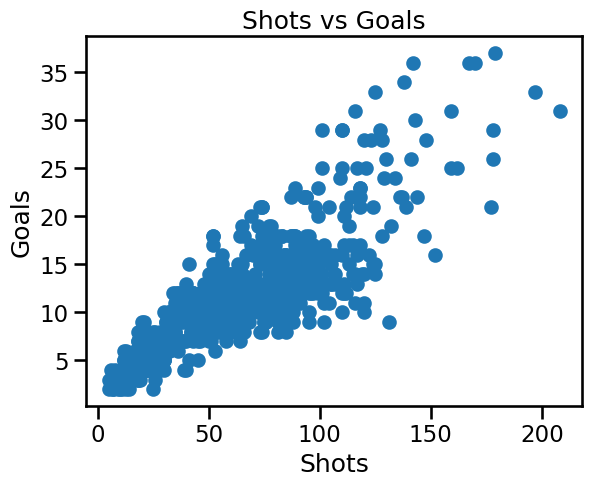

In [107]:
ax = plt.axes()
ax.scatter(df['Shots'],df['Goals'])
ax.set(xlabel='Shots',ylabel='Goals',title='Shots vs Goals')

In [108]:
labelen = df.copy()
labelencode=LabelEncoder()
categorical_clmns = ['Country','League','Club']
encoding_info = {}
for column in categorical_clmns:
    labelen[column] = labelencode.fit_transform(labelen[column])
    encoding_info[column] = dict(zip(labelencode.transform(labelencode.classes_), labelencode.classes_))
    

In [109]:
labelen

,Country,League,Club,Player Names,Matches_Played,Substitution,Mins,Goals,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Year
0,7,3,14,Juanmi Callejon,19,16,1849,11,6.62,0.34,48,20,2.47,1.03,2016
1,7,3,11,Antoine Griezmann,36,0,3129,16,11.86,0.36,88,41,2.67,1.24,2016
2,7,3,6,Luis Suarez,34,1,2940,28,23.21,0.75,120,57,3.88,1.84,2016
3,7,3,31,Ruben Castro,32,3,2842,13,14.06,0.47,117,42,3.91,1.40,2016
4,7,3,155,Kevin Gameiro,21,10,1745,13,10.65,0.58,50,23,2.72,1.25,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,0,2,154,Gyrano Kerk,24,0,2155,10,7.49,0.33,50,18,2.20,0.79,2020
656,0,2,1,Quincy Promes,18,2,1573,12,9.77,0.59,56,30,3.38,1.81,2020
657,0,2,119,Denzel Dumfries,25,0,2363,7,5.72,0.23,45,14,1.81,0.56,2020
658,0,2,176,Cyriel Dessers,26,0,2461,15,14.51,0.56,84,43,3.24,1.66,2020


In [110]:
df.columns

Index(['Country', 'League', 'Club', 'Player Names', 'Matches_Played',
       'Substitution ', 'Mins', 'Goals', 'xG', 'xG Per Avg Match', 'Shots',
       'OnTarget', 'Shots Per Avg Match', 'On Target Per Avg Match', 'Year'],
      dtype='object')

In [111]:
new_col = ['Player Names','Country','Club','League','Year','Substitution ','Mins','Matches_Played','xG','xG Per Avg Match','Shots','OnTarget','Shots Per Avg Match','On Target Per Avg Match','Goals']
df = df[new_col]

In [112]:
df.head()

,Player Names,Country,Club,League,Year,Substitution,Mins,Matches_Played,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Goals
0,Juanmi Callejon,Spain,(BET),La Liga,2016,16,1849,19,6.62,0.34,48,20,2.47,1.03,11
1,Antoine Griezmann,Spain,(BAR),La Liga,2016,0,3129,36,11.86,0.36,88,41,2.67,1.24,16
2,Luis Suarez,Spain,(ATL),La Liga,2016,1,2940,34,23.21,0.75,120,57,3.88,1.84,28
3,Ruben Castro,Spain,(CAR),La Liga,2016,3,2842,32,14.06,0.47,117,42,3.91,1.40,13
4,Kevin Gameiro,Spain,(VAL),La Liga,2016,10,1745,21,10.65,0.58,50,23,2.72,1.25,13


In [113]:
df[df['Player Names']=='Lionel Messi']

,Player Names,Country,Club,League,Year,Substitution,Mins,Matches_Played,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Goals
12,Lionel Messi,Spain,(BAR),La Liga,2016,2,2910,32,26.65,0.87,179,76,5.84,2.48,37
107,Lionel Messi,Spain,(BAR),La Liga,2017,4,3123,32,32.54,0.99,197,95,5.99,2.89,33
195,Lionel Messi,Spain,(BAR),La Liga,2018,5,2849,29,25.49,0.85,170,87,5.67,2.90,36
333,Lionel Messi,Spain,(BAR),La Liga,2019,1,3067,32,21.63,0.67,159,68,4.93,2.11,25
528,Lionel Messi,Spain,(BAR),La Liga,2020,1,824,8,5.46,0.63,39,19,4.50,2.19,4


In [114]:
labelen.at[5, 'Club'] = 126  # Replace 'new_value1' with the new value for the 3rd row
labelen.at[112, 'Club'] = 126
df[df['Player Names']=='Angel Di Maria']

,Player Names,Country,Club,League,Year,Substitution,Mins,Matches_Played,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Goals
240,Angel Di Maria,France,(PSG),Ligue 1,2018,2,2418,28,10.44,0.41,97,30,3.81,1.18,12


In [115]:
df.columns

Index(['Player Names', 'Country', 'Club', 'League', 'Year', 'Substitution ',
       'Mins', 'Matches_Played', 'xG', 'xG Per Avg Match', 'Shots', 'OnTarget',
       'Shots Per Avg Match', 'On Target Per Avg Match', 'Goals'],
      dtype='object')

In [116]:
X =labelen[[ 'Country', 'Club', 'League', 'Year', 'Substitution ',
       'Mins', 'Matches_Played', 'xG', 'xG Per Avg Match', 'Shots', 'OnTarget',
       'Shots Per Avg Match', 'On Target Per Avg Match']]
Y = labelen['Goals']

In [117]:
print(X.shape)  # Check the shape of your features
print(Y.shape) 

(660, 13)
(660,)


In [118]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, random_state=42)

In [119]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [120]:
from sklearn.metrics import mean_squared_error
from math import sqrt

y_pred = model.predict(X_test)
rmse = sqrt(mean_squared_error(y_test, y_pred))
rmse

2.2373597793271025

In [121]:
df

,Player Names,Country,Club,League,Year,Substitution,Mins,Matches_Played,xG,xG Per Avg Match,Shots,OnTarget,Shots Per Avg Match,On Target Per Avg Match,Goals
0,Juanmi Callejon,Spain,(BET),La Liga,2016,16,1849,19,6.62,0.34,48,20,2.47,1.03,11
1,Antoine Griezmann,Spain,(BAR),La Liga,2016,0,3129,36,11.86,0.36,88,41,2.67,1.24,16
2,Luis Suarez,Spain,(ATL),La Liga,2016,1,2940,34,23.21,0.75,120,57,3.88,1.84,28
3,Ruben Castro,Spain,(CAR),La Liga,2016,3,2842,32,14.06,0.47,117,42,3.91,1.40,13
4,Kevin Gameiro,Spain,(VAL),La Liga,2016,10,1745,21,10.65,0.58,50,23,2.72,1.25,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
655,Gyrano Kerk,Netherlands,(UTR),Eredivisie,2020,0,2155,24,7.49,0.33,50,18,2.20,0.79,10
656,Quincy Promes,Netherlands,(AJA),Eredivisie,2020,2,1573,18,9.77,0.59,56,30,3.38,1.81,12
657,Denzel Dumfries,Netherlands,(PSV),Eredivisie,2020,0,2363,25,5.72,0.23,45,14,1.81,0.56,7
658,Cyriel Dessers,Netherlands,None,Eredivisie,2020,0,2461,26,14.51,0.56,84,43,3.24,1.66,15


# EDA 

[Text(0.5, 0, 'On Target Shots'),
 Text(0, 0.5, 'Frequency'),
 Text(0.5, 1.0, 'Distribution of On target shots')]

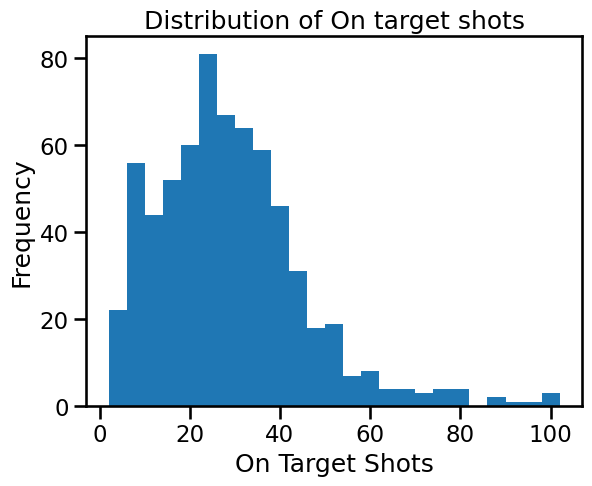

In [122]:
ax = plt.axes()
ax.hist(df.OnTarget, bins=25);

ax.set(xlabel='On Target Shots', 
       ylabel='Frequency',
       title='Distribution of On target shots')

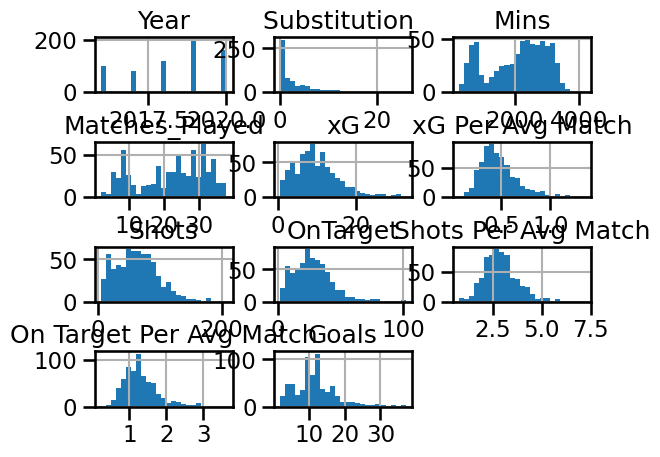

In [123]:
axList = df.hist(bins=25)
plt.subplots_adjust(hspace=0.9) 

array([[<Axes: title={'center': 'Goals'}, xlabel='[Year]'>,
        <Axes: title={'center': 'Matches_Played'}, xlabel='[Year]'>,
        <Axes: title={'center': 'Mins'}, xlabel='[Year]'>],
       [<Axes: title={'center': 'On Target Per Avg Match'}, xlabel='[Year]'>,
        <Axes: title={'center': 'OnTarget'}, xlabel='[Year]'>,
        <Axes: title={'center': 'Shots'}, xlabel='[Year]'>],
       [<Axes: title={'center': 'Shots Per Avg Match'}, xlabel='[Year]'>,
        <Axes: title={'center': 'Substitution '}, xlabel='[Year]'>,
        <Axes: title={'center': 'xG'}, xlabel='[Year]'>],
       [<Axes: title={'center': 'xG Per Avg Match'}, xlabel='[Year]'>,
        <Axes: >, <Axes: >]], dtype=object)

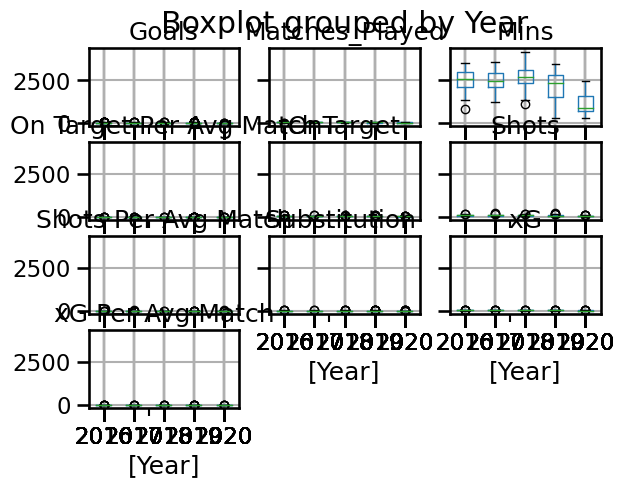

In [124]:
df.boxplot(by='Year')

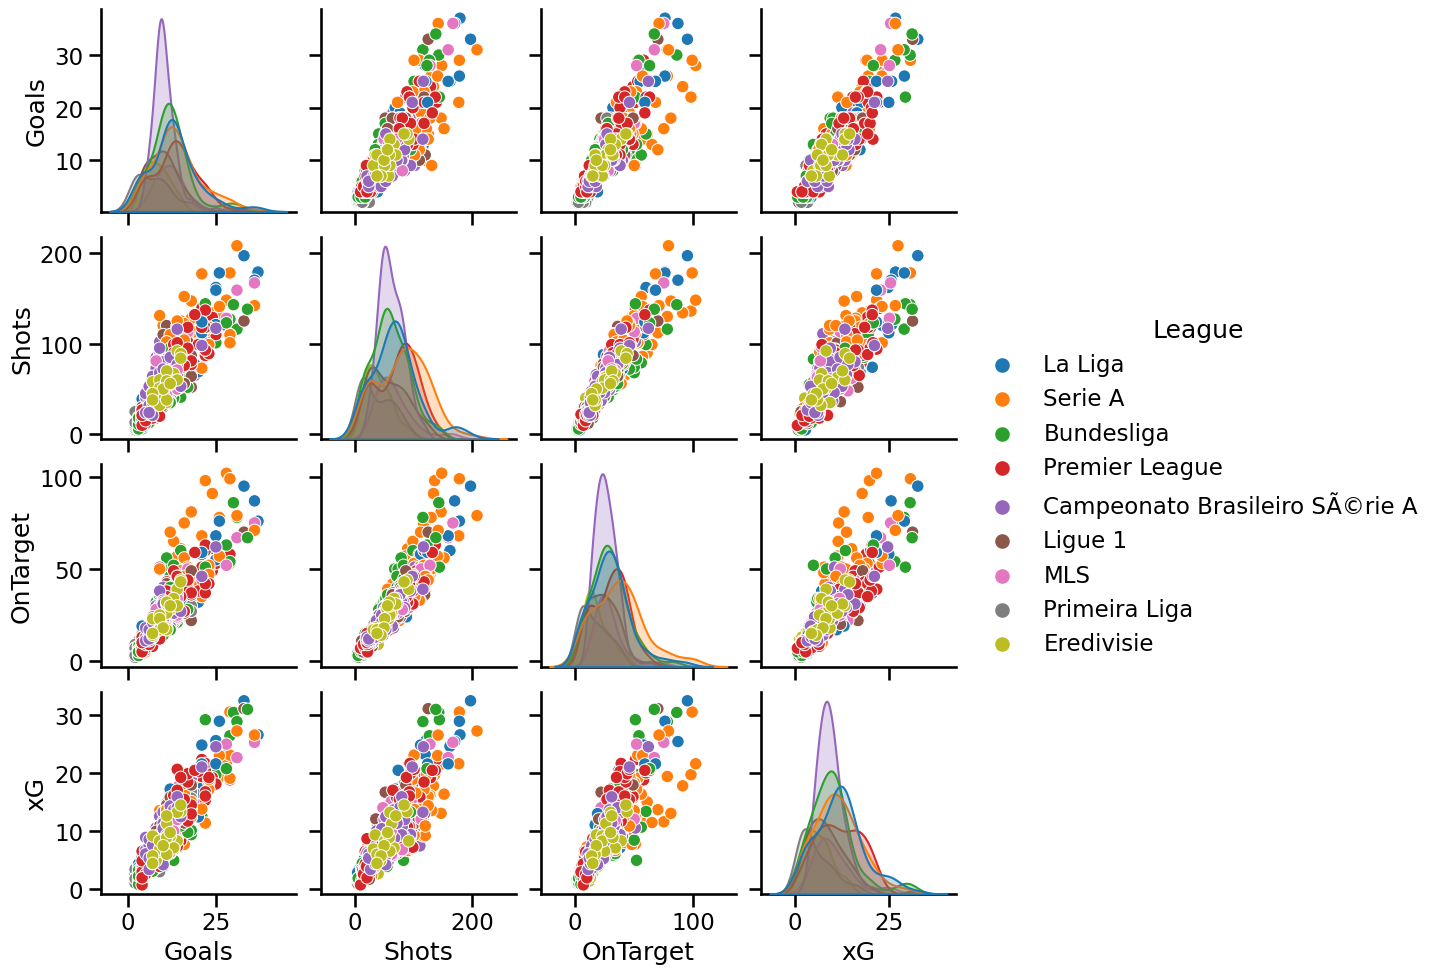

In [125]:
pairpl= df[['League','Goals','Shots','OnTarget','xG']]
sns.pairplot(pairpl, hue='League')
sns.set_context('talk')

In [126]:
one_hot_encode_cols = df.dtypes[df.dtypes == object]  # filtering by string categoricals
one_hot_encode_cols = one_hot_encode_cols.index.tolist() # list of categorical fields

one_hot_encode_cols.

['Player Names', 'Country', 'Club', 'League']